# HW7
We load and split the [USArrests dataset](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests).

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data = pd.read_csv("usarrests.csv", index_col=0)

# Features for use in clustering.
X = data[["Murder", "Assault", "UrbanPop", "Rape"]]

# For whitening datasets for KMeans clustering.
whitener = PCA(whiten=True)

# Split into training and validation sets.
X_train, X_val = train_test_split(X, random_state=0)

# Whiten.
X_train = whitener.fit_transform(X_train)
X_val = whitener.transform(X_val)



Fit KMeans clusters to the training set for K in [2, 10] using a `random_state` of `0`. Plot the training inertias as a function of K. In a separate figure, plot the validation inertias as a function of K.

In [45]:
from sklearn.cluster import KMeans

inertias_train = []
for K in range(2,11):
    km=KMeans(n_clusters=K,random_state=0)
    km.fit_predict(X_train)
    inertias_train.append(km.inertia_)

In [46]:
inertias_train

[115.75646552722685,
 93.6033947276861,
 76.48088544495889,
 59.44876825301906,
 52.53445319546332,
 44.45429197190435,
 38.077707635662975,
 32.58946390694302,
 29.83748595769012]

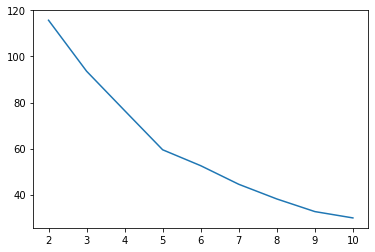

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),inertias_train)

In [48]:
from sklearn.cluster import KMeans

inertias_train = []
inertia_val=[]
k=[]
for K in range(2,11):
    km=KMeans(n_clusters=K,random_state=0).fit(X_train)
    val = km.cluster_centers_[km.predict(X_val)]
    inertias_train.append(km.inertia_)
    inertia_val.append(sum((X_val-val)**2))
    k.append(K)
    

In [57]:
inertia_val_=[]
for i in range(0,9):
    inertia_val1=inertia_val[i].sum()
    inertia_val_.append(inertia_val1)


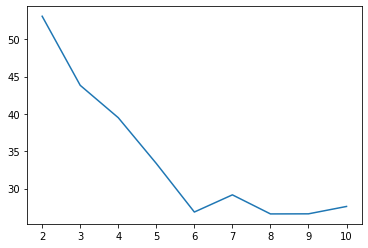

In [58]:
plt.plot(k,inertia_val_)

Based on the training plot, what value of K would the elbow method recommend selecting? Explain.

### Answer: Based on the training plot, the optimal K value is 5. The optimal K values is 5 because we can observe the point of inflection in curve is by K = 5 which indicates that the underlying model fits best at that point.

Justify the elbow method based on the validation plot.

### Answer: The elbow method for validation set gives us a plot with point of inflection in curve which is K = 6. Since the K values of both plots are somewhat close or close to each other, this justifies that the K = 5 from the training set can be an optimal number of clusters. 